In [26]:
%load_ext autoreload
%autoreload 2

import numpy as np
from timeit import time
from shape import Shape, Block
from shape_boat import ShapeBoat, ShapeBoat_spline
from shapeshift_trajectory import shapeshift_trajectory, write_results, experiments, print_results_tables

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload



## 1. Composing Shapes from Blocks

In [52]:
shape_1a = Shape([Block(0,0)])
shape_1b = Shape([Block(0,0,90)])
shape_2a = Shape([Block(-.5,0),   Block(.5,0)])
shape_2b = Shape([Block(0,0.25),  Block(0,-0.25)])
shape_2c = Shape([Block(-.25,0,90),Block(0.25,0,90)])
shape_2d = Shape([Block(0,-.5,90) ,Block(0,.5,90)])
shape_3a = Shape([Block(-.5,0),   Block(.5,0),   Block(-1.25,0.25,90)])
shape_3b = Shape([Block(-.5,0),   Block(.5,0,0), Block(-.5,0.5)])
shape_3c = Shape([Block(0,0),     Block(-1,0),   Block(1,0)])
shape_4a = Shape([Block(-.5,0),   Block(.5,0),   Block(-1.25,0.25,90),Block(1.25,0.25,90)])
shape_4b = Shape([Block(-.5,-.25),Block(-.5,.25),Block(.5,-.25),      Block(.5,.25)])
shape_6a = Shape([Block(0,0),     Block(1.,0),   Block(0,0.5),        Block(-1.,0.5),Block(1.,0.5),Block(1.,-.5)])

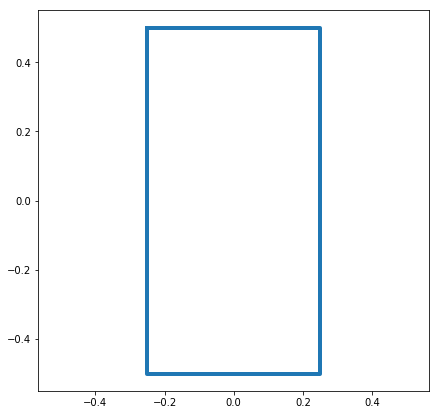

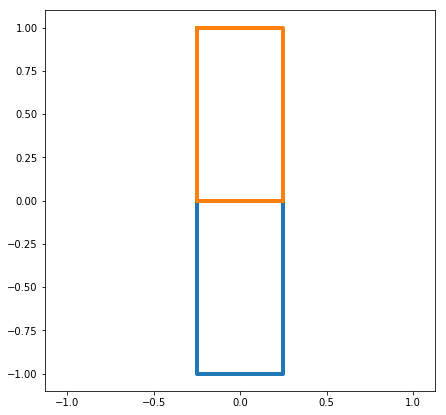

In [3]:
moving_shape=shape_1b
obstacle_shape=shape_2d

moving_shape.plot(union=False)
obstacle_shape.plot(union=False)

### Partitioning of convex hulls around shape

In [37]:
msums, hulls = obstacle_shape.c_space_rotate(moving_shape)
#plot_hulls(hulls, text=False)

### C-Space of a given obstacle b

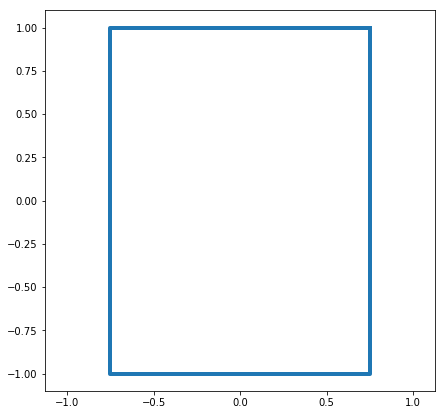

In [38]:
moving_shape.plot_polygons([msums.values()[3]])

### Finding Convex Hull of C-Space

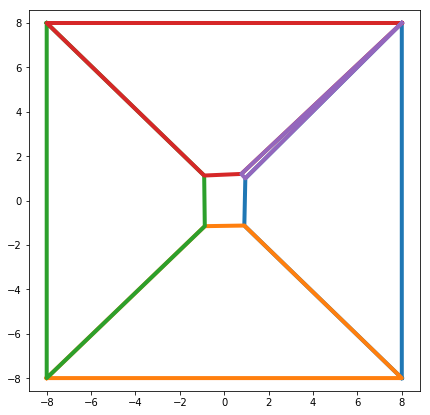

In [39]:
moving_shape.plot_polygons(hulls.values()[3])

## 2. Trajectory Planning

In [3]:
tests = {'1_line_to_L':         (shape_1a, shape_2a, (-2.5, 0.,   0.),    (-1,     .5,   0.)),  \
         '2_T_to_block':        (shape_1a, shape_3b, (-1.5, 0.,   0.),    (.5,     .5,   0.)),  \
         '3_line_to_block':     (shape_2a, shape_2a, (-2.,  0.,   0.),    (0.,     .5,   0.)),  \
         '4_line_to_L_2':        (shape_2a, shape_2a, (-2.,  0.,   0.),    (-1.25, .75,  90.)),  \
         '5_U_to_block':        (shape_3a, shape_3a, (2.5,  0.,   0.),    (0.,     .5, 180.)),  \
         '6_line_to_block_2':    (shape_4b, shape_4b, (-2.,  0.,   0.),    (0.,     1.,   0.)),  \
         '7_triangle_to_block': (shape_6a, shape_6a, ( 0.,-0.5, 180.),    (0.,    1.5, 180.)),  \
         '8_past':              (shape_1a, shape_4a, (-5.,  0.,   0.),    (5.,     0.,   0.))   \
        }

### MIQP - b-splines

SETTING ENDPOINTS
Calculated C-Space: 0.536460 seconds
Set up graph: 0.300140 seconds
finding_vertex POINT (0 -0.5) 180.0
finding_vertex POINT (0 1.5) 180.0
found path endpoint hulls 31 32
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 204
0.002977 seconds
ADDING COSTS
Number of costs 13
0.005667 seconds
ADDING CONSTRAINTS
Number of constraints 1612
0.167952 seconds
PLANNING
SolutionResult.kSolutionFound
0.108067 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.445391 seconds
Set up graph: 0.288148 seconds
finding_vertex POINT (0 -0.5) 180.0
finding_vertex POINT (0 1.5) 180.0
found path endpoint hulls 31 32
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 116
0.003073 seconds
ADDING COSTS
Number of costs 12
0.004837 seconds
ADDING CONSTRAINTS
Number of constraints 550
0.192326 seconds
PLANNING
SolutionResult.kSolutionFound
0.302598 seconds

Time Scaling target: 1.000000, result: 1.000000


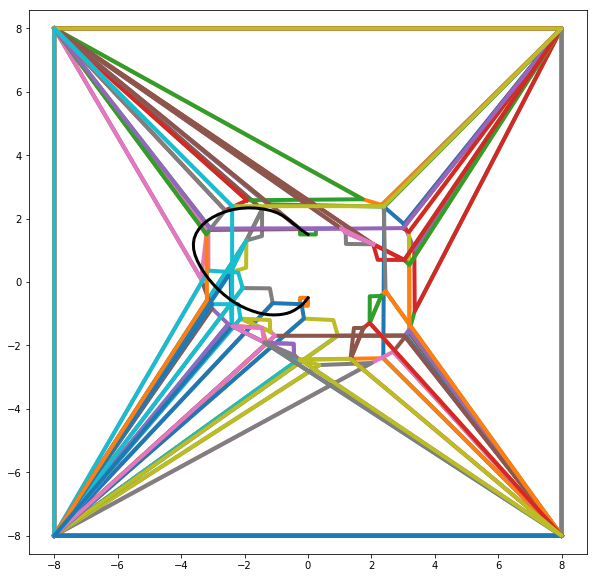

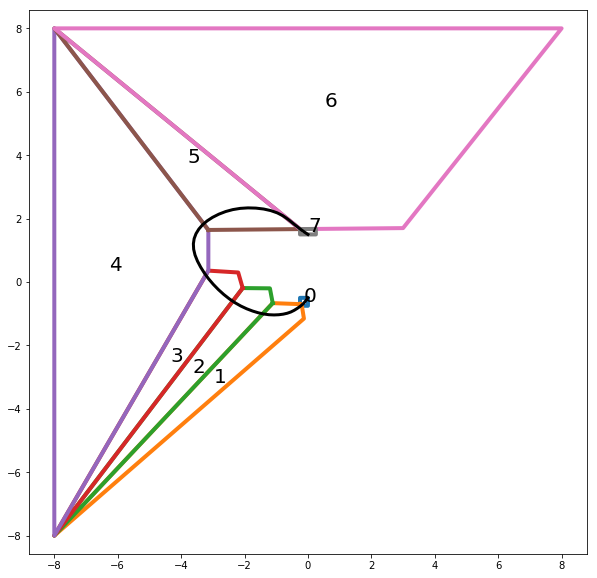

In [59]:
test = '7_triangle_to_block'

x = time.time()
experiment = shapeshift_trajectory(*tests[test], N=11, boat_type=ShapeBoat_spline, boat_type_init=ShapeBoat_spline)

### Show polytope graph from plan

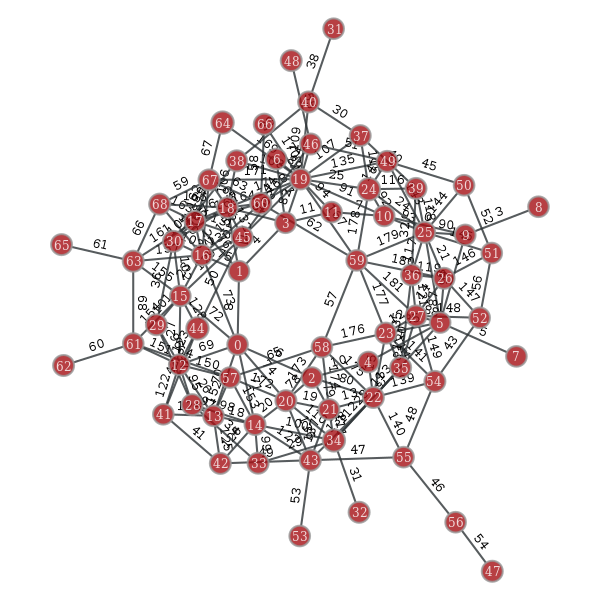

In [43]:
experiment['boat'].g.draw_graph()

## 3. Running Experiments

SETTING ENDPOINTS
Calculated C-Space: 0.199602 seconds
Set up graph: 0.203301 seconds
finding_vertex POINT (2.5 0) 0.0
finding_vertex POINT (0 0.5) 180.0
found path endpoint hulls 38 31
INITIALIZED ShapeBoat 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 193
0.002235 seconds
ADDING COSTS
Number of costs 2
0.001155 seconds
ADDING CONSTRAINTS
Number of constraints 846
0.058487 seconds
PLANNING
SolutionResult.kSolutionFound
0.153279 seconds



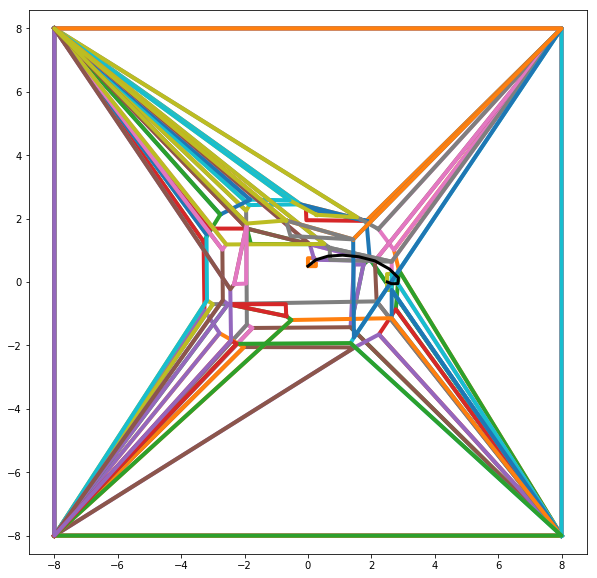

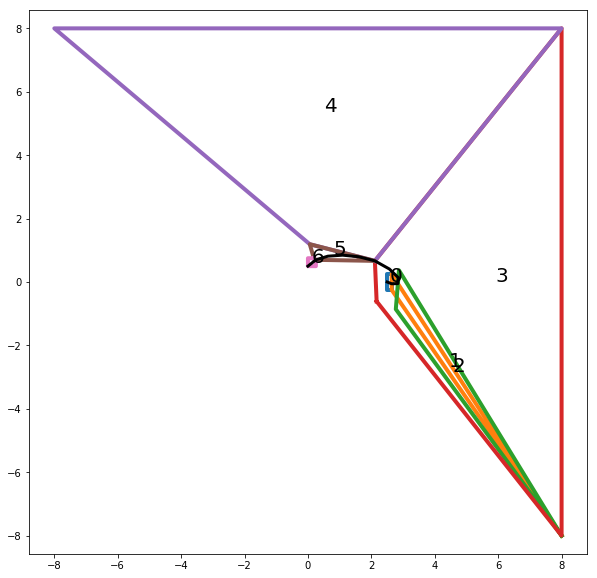

SETTING ENDPOINTS
Calculated C-Space: 0.367571 seconds
Set up graph: 0.114877 seconds
finding_vertex POINT (-5 0) 0.0
finding_vertex POINT (5 0) 0.0
found path endpoint hulls 13 8
INITIALIZED ShapeBoat 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 149
0.001431 seconds
ADDING COSTS
Number of costs 2
0.001143 seconds
ADDING CONSTRAINTS
Number of constraints 436
0.028665 seconds
PLANNING
SolutionResult.kSolutionFound
0.073163 seconds



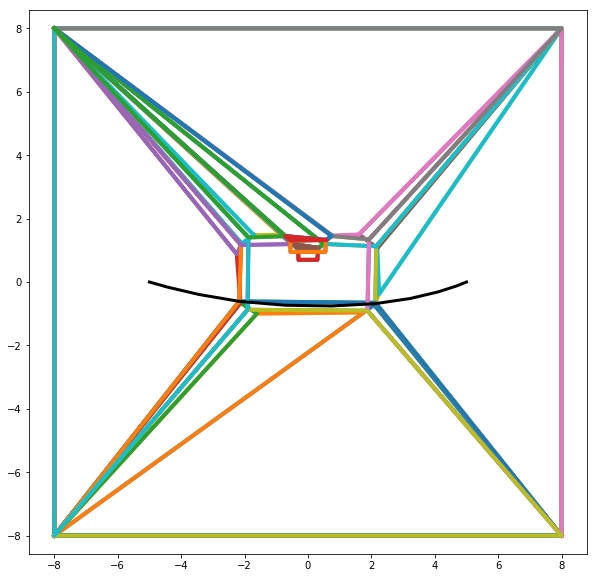

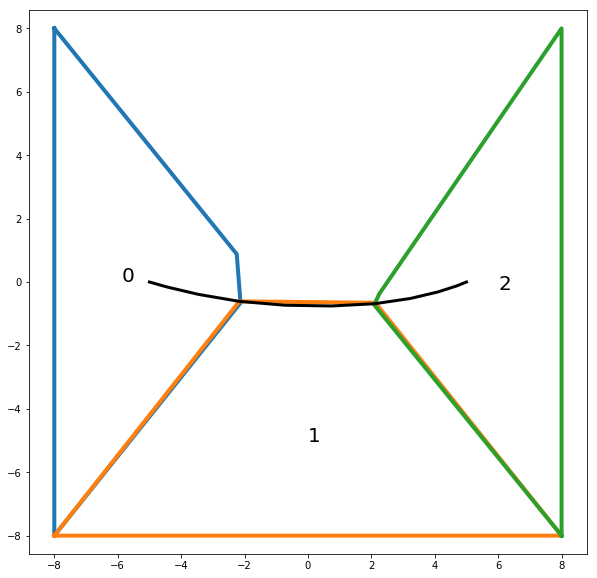

SETTING ENDPOINTS
Calculated C-Space: 0.231203 seconds
Set up graph: 0.163770 seconds
finding_vertex POINT (-2 0) 0.0
finding_vertex POINT (0 0.5) 0.0
found path endpoint hulls 34 38
INITIALIZED ShapeBoat 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 182
0.002008 seconds
ADDING COSTS
Number of costs 2
0.001125 seconds
ADDING CONSTRAINTS
Number of constraints 738
0.048454 seconds
PLANNING
SolutionResult.kSolutionFound
0.155879 seconds



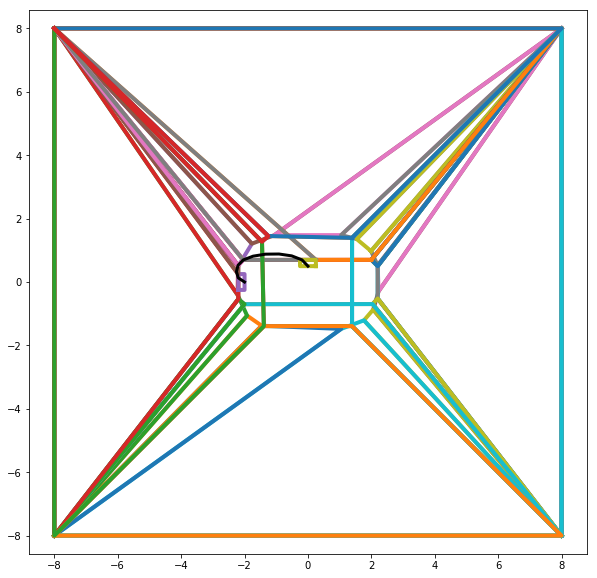

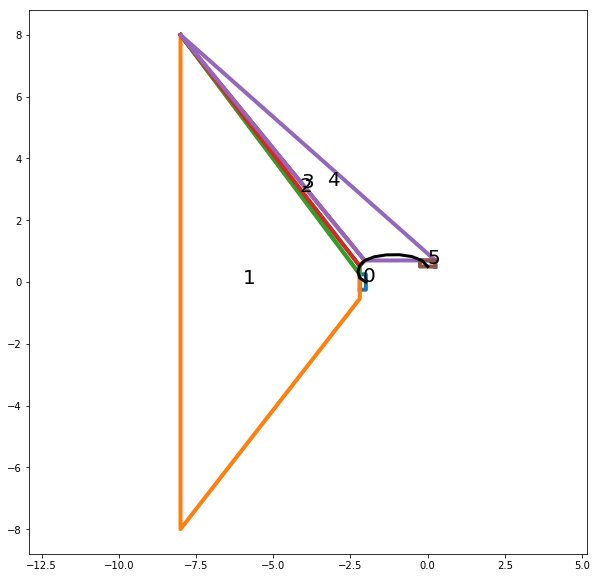

SETTING ENDPOINTS
Calculated C-Space: 0.480795 seconds
Set up graph: 0.261953 seconds
finding_vertex POINT (0 -0.5) 180.0
finding_vertex POINT (0 1.5) 180.0
found path endpoint hulls 31 32
INITIALIZED ShapeBoat 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 204
0.002536 seconds
ADDING COSTS
Number of costs 2
0.001317 seconds
ADDING CONSTRAINTS
Number of constraints 1020
0.071502 seconds
PLANNING
SolutionResult.kSolutionFound
0.111302 seconds



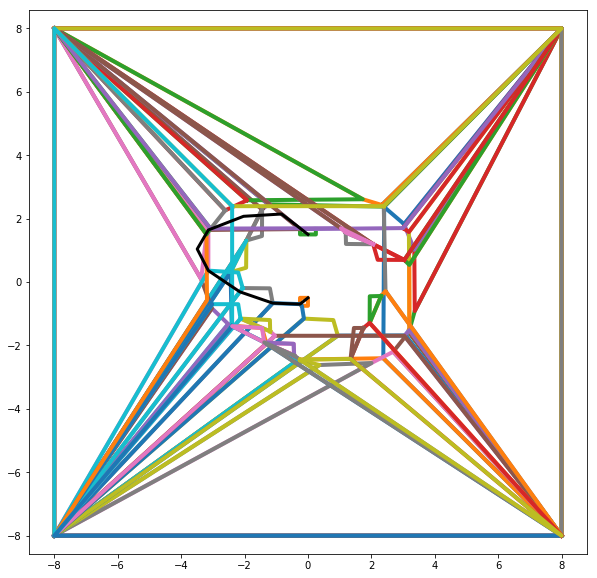

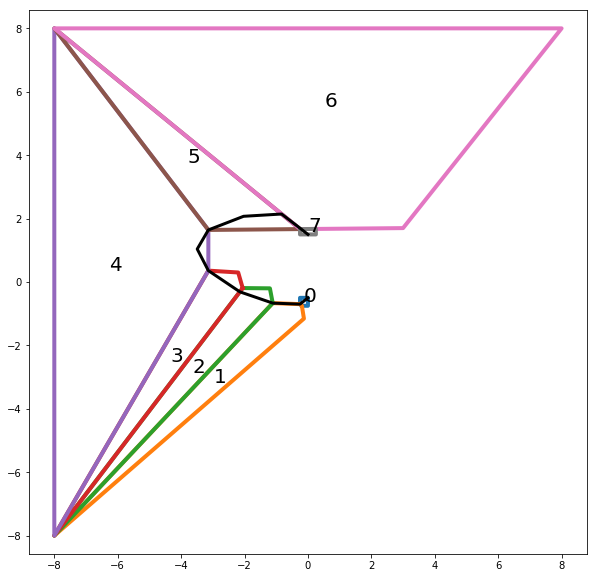

SETTING ENDPOINTS
Calculated C-Space: 0.213737 seconds
Set up graph: 0.176285 seconds
finding_vertex POINT (-2 0) 0.0
finding_vertex POINT (-1.25 0.75) 90.0
found path endpoint hulls 36 5
INITIALIZED ShapeBoat 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 171
0.001833 seconds
ADDING COSTS
Number of costs 2
0.001379 seconds
ADDING CONSTRAINTS
Number of constraints 696
0.048984 seconds
PLANNING
SolutionResult.kSolutionFound
0.140774 seconds



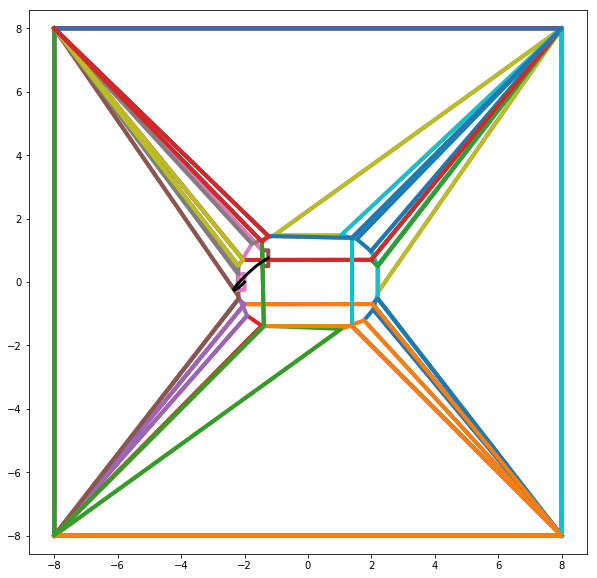

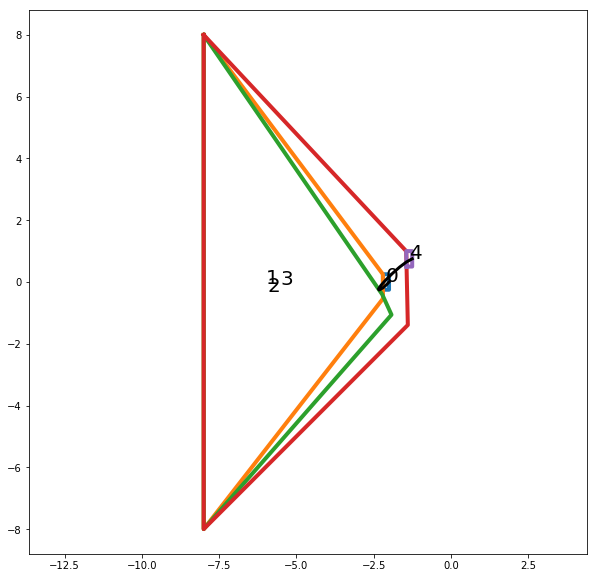

SETTING ENDPOINTS
Calculated C-Space: 0.237736 seconds
Set up graph: 0.125520 seconds
finding_vertex POINT (-1.5 0) 0.0
finding_vertex POINT (0.5 0.5) 0.0
found path endpoint hulls 29 31
INITIALIZED ShapeBoat 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 182
0.002318 seconds
ADDING COSTS
Number of costs 2
0.001329 seconds
ADDING CONSTRAINTS
Number of constraints 782
0.056676 seconds
PLANNING
SolutionResult.kSolutionFound
0.191430 seconds



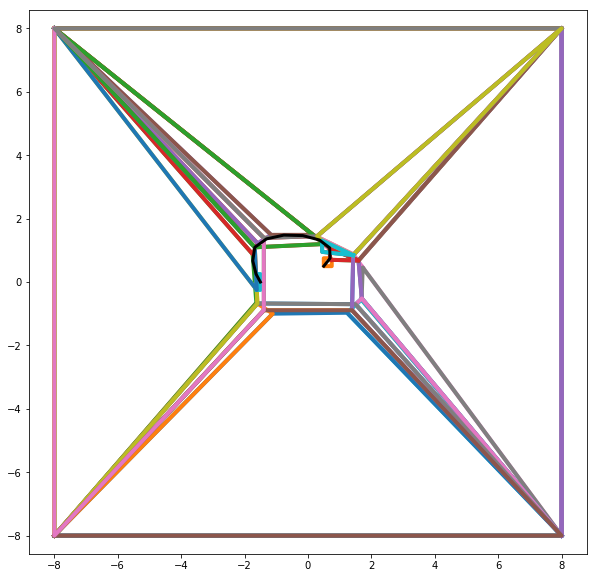

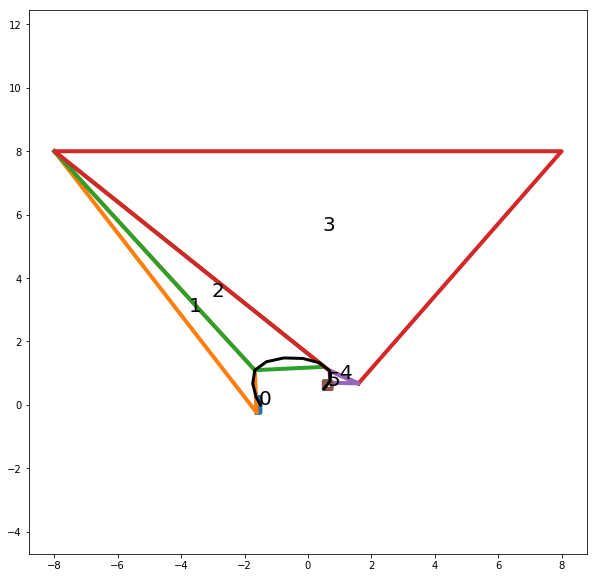

SETTING ENDPOINTS
Calculated C-Space: 0.188890 seconds
Set up graph: 0.110685 seconds
finding_vertex POINT (-2.5 0) 0.0
finding_vertex POINT (-1 0.5) 0.0
found path endpoint hulls 12 30
INITIALIZED ShapeBoat 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 160
0.001609 seconds
ADDING COSTS
Number of costs 2
0.001124 seconds
ADDING CONSTRAINTS
Number of constraints 544
0.038191 seconds
PLANNING
SolutionResult.kSolutionFound
0.137211 seconds



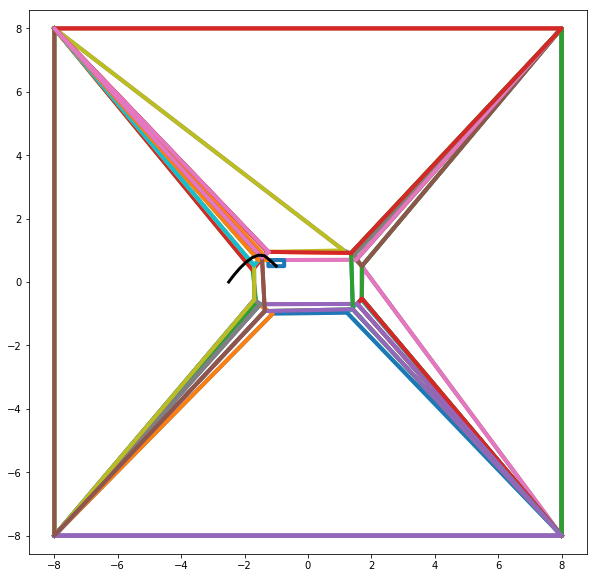

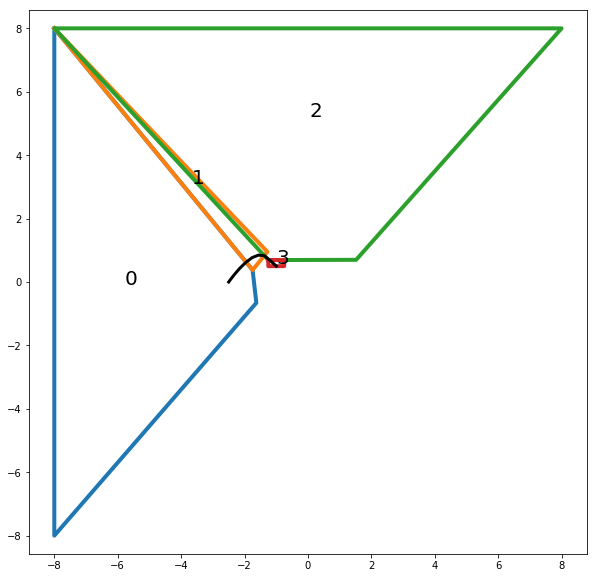

SETTING ENDPOINTS
Calculated C-Space: 0.323396 seconds
Set up graph: 0.140368 seconds
finding_vertex POINT (-2 0) 0.0
finding_vertex POINT (0 1) 0.0
found path endpoint hulls 28 30
INITIALIZED ShapeBoat 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 171
0.002383 seconds
ADDING COSTS
Number of costs 2
0.001114 seconds
ADDING CONSTRAINTS
Number of constraints 674
0.045558 seconds
PLANNING
SolutionResult.kSolutionFound
0.274439 seconds



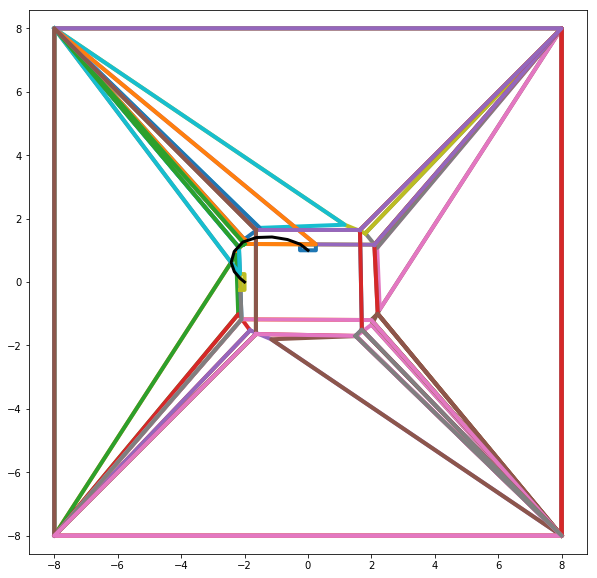

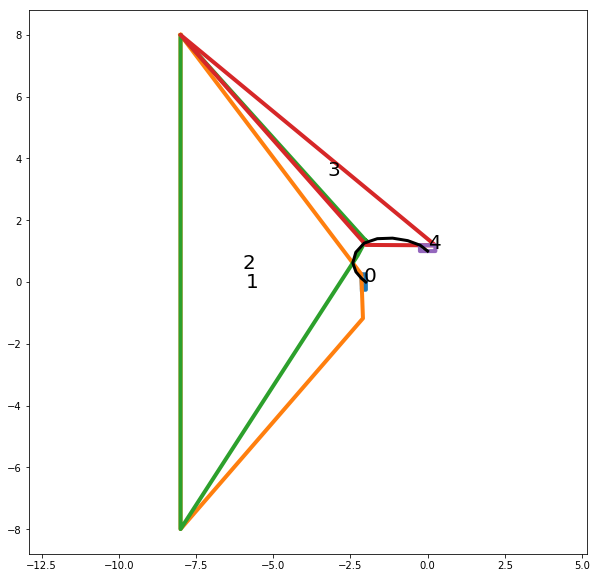

SETTING ENDPOINTS
Calculated C-Space: 0.187057 seconds
Set up graph: 0.231102 seconds
finding_vertex POINT (2.5 0) 0.0
finding_vertex POINT (0 0.5) 180.0
found path endpoint hulls 38 31
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 193
0.002588 seconds
ADDING COSTS
Number of costs 13
0.005113 seconds
ADDING CONSTRAINTS
Number of constraints 1298
0.141261 seconds
PLANNING
SolutionResult.kSolutionFound
0.096040 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.161273 seconds
Set up graph: 0.301282 seconds
finding_vertex POINT (2.5 0) 0.0
finding_vertex POINT (0 0.5) 180.0
found path endpoint hulls 38 31
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 116
0.009220 seconds
ADDING COSTS
Number of costs 12
0.010660 seconds
ADDING CONSTRAINTS
Number of constraints 352
0.250170 seconds
PLANNING
SolutionResult.kSolutionFound
0.135839 seconds

Time Scaling target: 1.000000, result: 1.000000


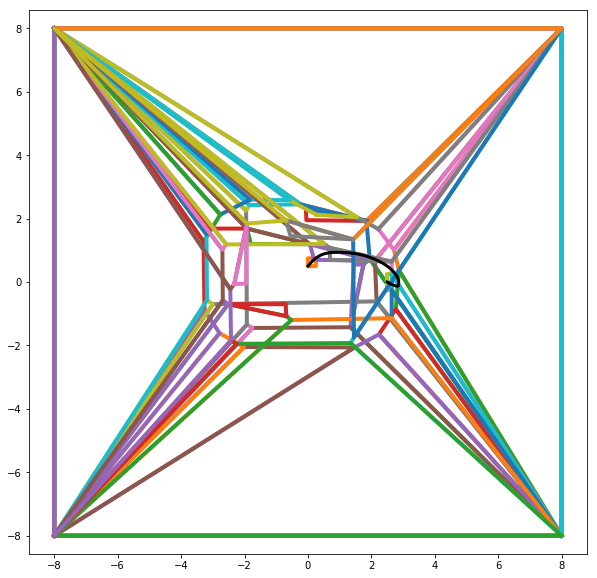

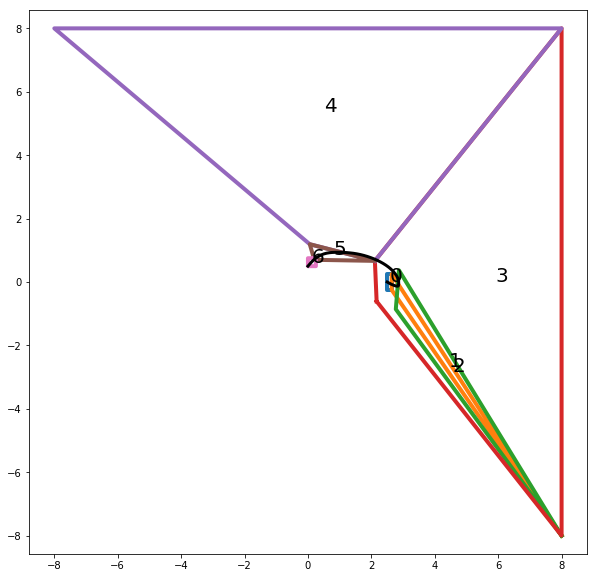

SETTING ENDPOINTS
Calculated C-Space: 0.295961 seconds
Set up graph: 0.138458 seconds
finding_vertex POINT (-5 0) 0.0
finding_vertex POINT (5 0) 0.0
found path endpoint hulls 13 8
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 149
0.001477 seconds
ADDING COSTS
Number of costs 13
0.005598 seconds
ADDING CONSTRAINTS
Number of constraints 588
0.087802 seconds
PLANNING
SolutionResult.kSolutionFound
0.168466 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.252816 seconds
Set up graph: 0.133588 seconds
finding_vertex POINT (-5 0) 0.0
finding_vertex POINT (5 0) 0.0
found path endpoint hulls 13 8
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 116
0.002970 seconds
ADDING COSTS
Number of costs 12
0.005015 seconds
ADDING CONSTRAINTS
Number of constraints 198
0.066539 seconds
PLANNING
SolutionResult.kSolutionFound
0.065671 seconds

Time Scaling target: 1.000000, result: 1.000000


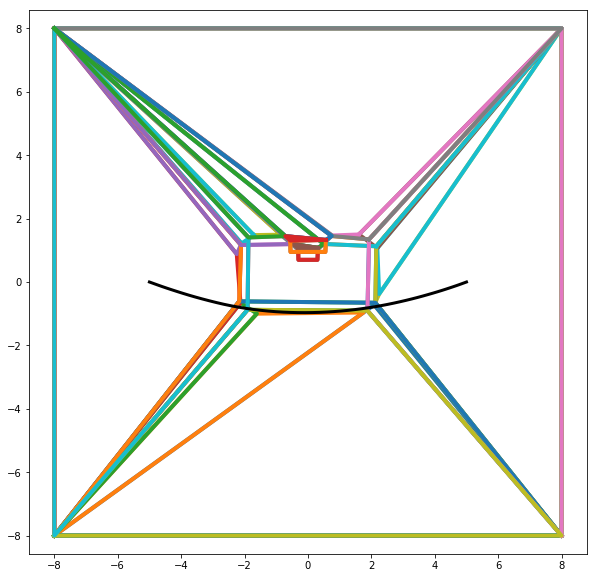

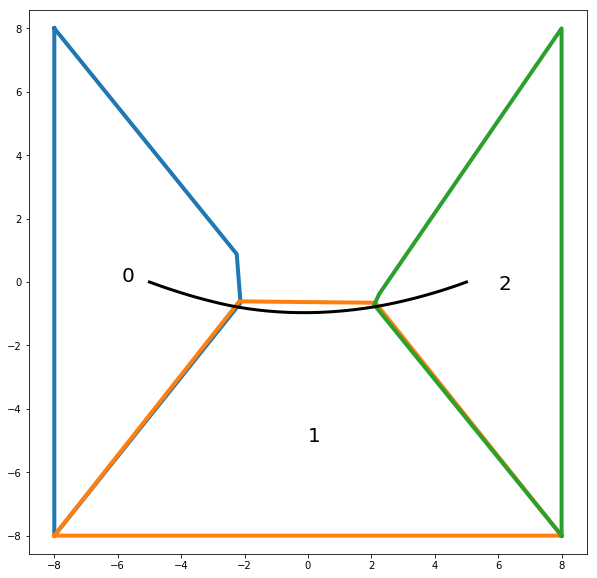

SETTING ENDPOINTS
Calculated C-Space: 0.257592 seconds
Set up graph: 0.148966 seconds
finding_vertex POINT (-2 0) 0.0
finding_vertex POINT (0 0.5) 0.0
found path endpoint hulls 34 38
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 182
0.002009 seconds
ADDING COSTS
Number of costs 13
0.005057 seconds
ADDING CONSTRAINTS
Number of constraints 1110
0.120360 seconds
PLANNING
SolutionResult.kSolutionFound
0.185025 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.258807 seconds
Set up graph: 0.161070 seconds
finding_vertex POINT (-2 0) 0.0
finding_vertex POINT (0 0.5) 0.0
found path endpoint hulls 34 38
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 116
0.003272 seconds
ADDING COSTS
Number of costs 12
0.004576 seconds
ADDING CONSTRAINTS
Number of constraints 352
0.116699 seconds
PLANNING
SolutionResult.kSolutionFound
0.151026 seconds

Time Scaling target: 1.000000, result: 1.000000


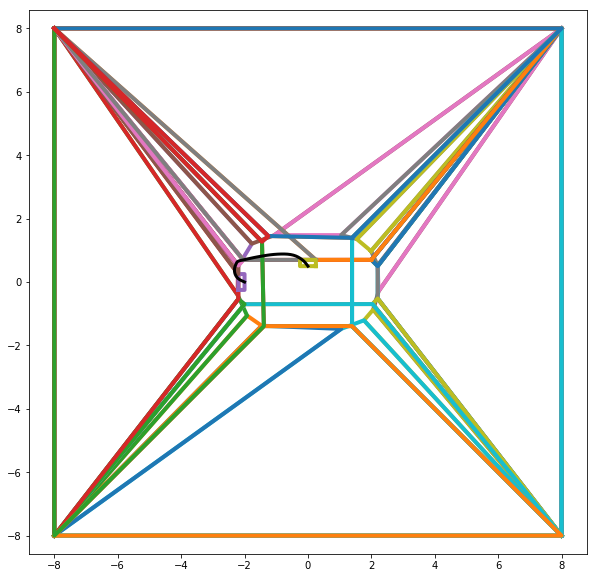

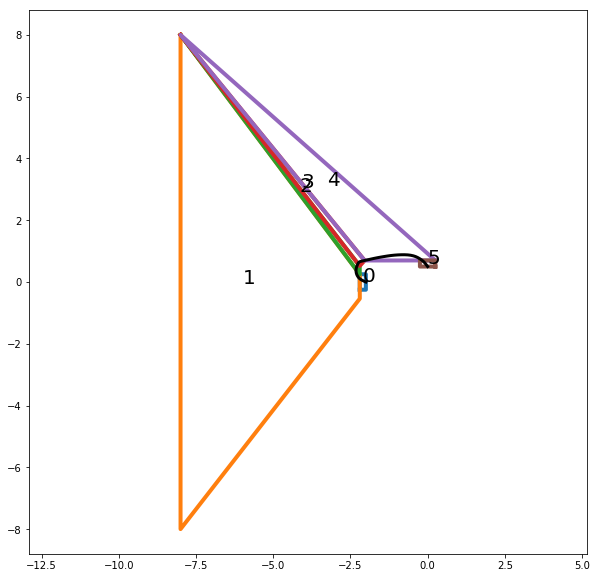

SETTING ENDPOINTS
Calculated C-Space: 0.554320 seconds
Set up graph: 0.239677 seconds
finding_vertex POINT (0 -0.5) 180.0
finding_vertex POINT (0 1.5) 180.0
found path endpoint hulls 31 32
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 204
0.002323 seconds
ADDING COSTS
Number of costs 13
0.005066 seconds
ADDING CONSTRAINTS
Number of constraints 1612
0.165426 seconds
PLANNING
SolutionResult.kSolutionFound
0.105969 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.402340 seconds
Set up graph: 0.271608 seconds
finding_vertex POINT (0 -0.5) 180.0
finding_vertex POINT (0 1.5) 180.0
found path endpoint hulls 31 32
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 116
0.003118 seconds
ADDING COSTS
Number of costs 12
0.004486 seconds
ADDING CONSTRAINTS
Number of constraints 550
0.168065 seconds
PLANNING
SolutionResult.kSolutionFound
0.125837 seconds

Time Scaling target: 1.000000, result: 1.000000


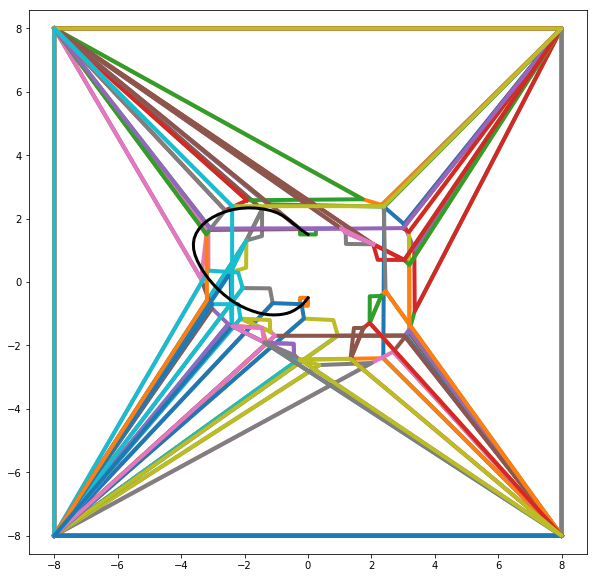

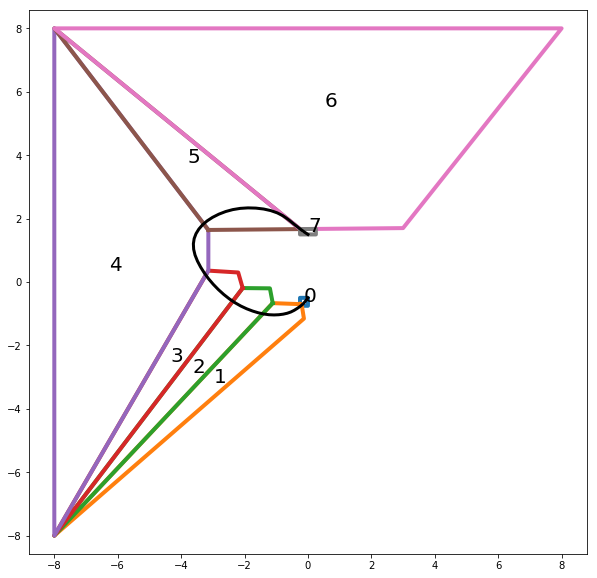

SETTING ENDPOINTS
Calculated C-Space: 0.210690 seconds
Set up graph: 0.148831 seconds
finding_vertex POINT (-2 0) 0.0
finding_vertex POINT (-1.25 0.75) 90.0
found path endpoint hulls 36 5
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 171
0.001792 seconds
ADDING COSTS
Number of costs 13
0.004996 seconds
ADDING CONSTRAINTS
Number of constraints 1048
0.112981 seconds
PLANNING
SolutionResult.kSolutionFound
0.253777 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.214095 seconds
Set up graph: 0.135492 seconds
finding_vertex POINT (-2 0) 0.0
finding_vertex POINT (-1.25 0.75) 90.0
found path endpoint hulls 36 5
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 116
0.003079 seconds
ADDING COSTS
Number of costs 12
0.004495 seconds
ADDING CONSTRAINTS
Number of constraints 286
0.101466 seconds
PLANNING
SolutionResult.kSolutionFound
0.146097 seconds

Time Scaling target: 1.000000, result: 1.000000


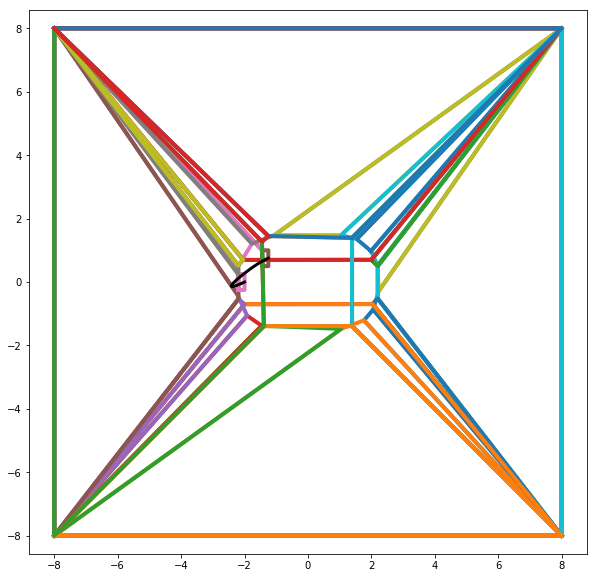

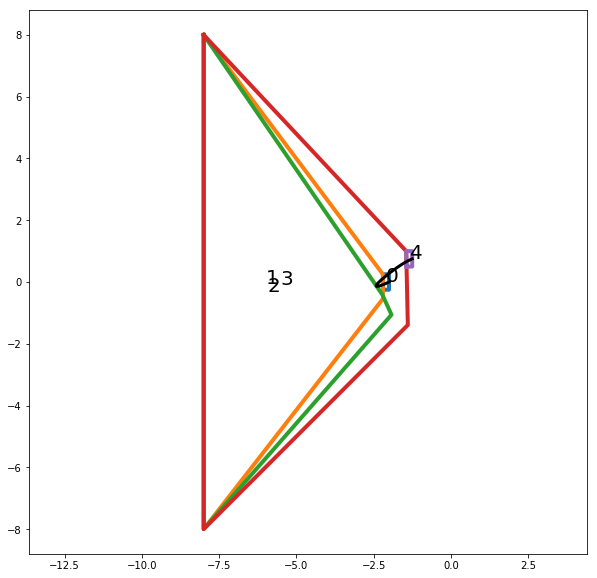

SETTING ENDPOINTS
Calculated C-Space: 0.234071 seconds
Set up graph: 0.113790 seconds
finding_vertex POINT (-1.5 0) 0.0
finding_vertex POINT (0.5 0.5) 0.0
found path endpoint hulls 29 31
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 182
0.002052 seconds
ADDING COSTS
Number of costs 13
0.004971 seconds
ADDING CONSTRAINTS
Number of constraints 1194
0.119033 seconds
PLANNING
SolutionResult.kSolutionFound
0.227721 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.200057 seconds
Set up graph: 0.123913 seconds
finding_vertex POINT (-1.5 0) 0.0
finding_vertex POINT (0.5 0.5) 0.0
found path endpoint hulls 29 31
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 116
0.002947 seconds
ADDING COSTS
Number of costs 12
0.004470 seconds
ADDING CONSTRAINTS
Number of constraints 374
0.136651 seconds
PLANNING
SolutionResult.kSolutionFound
0.074870 seconds

Time Scaling target: 1.000000, result: 1.000000


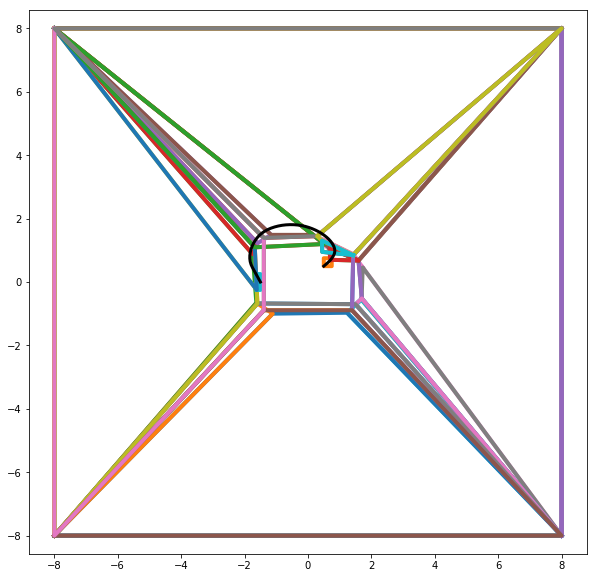

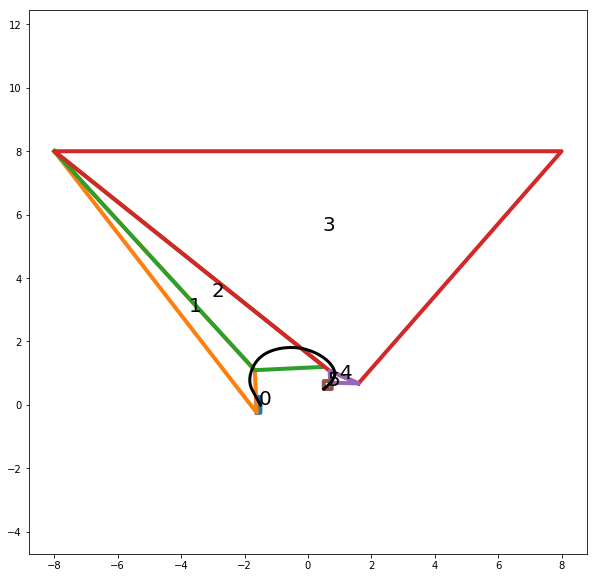

SETTING ENDPOINTS
Calculated C-Space: 0.258676 seconds
Set up graph: 0.130129 seconds
finding_vertex POINT (-2.5 0) 0.0
finding_vertex POINT (-1 0.5) 0.0
found path endpoint hulls 12 30
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 160
0.001721 seconds
ADDING COSTS
Number of costs 13
0.004910 seconds
ADDING CONSTRAINTS
Number of constraints 776
0.076936 seconds
PLANNING
SolutionResult.kSolutionFound
0.214513 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.201229 seconds
Set up graph: 0.098203 seconds
finding_vertex POINT (-2.5 0) 0.0
finding_vertex POINT (-1 0.5) 0.0
found path endpoint hulls 12 30
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 116
0.003027 seconds
ADDING COSTS
Number of costs 12
0.004498 seconds
ADDING CONSTRAINTS
Number of constraints 242
0.078524 seconds
PLANNING
SolutionResult.kSolutionFound
0.096597 seconds

Time Scaling target: 1.000000, result: 1.000000


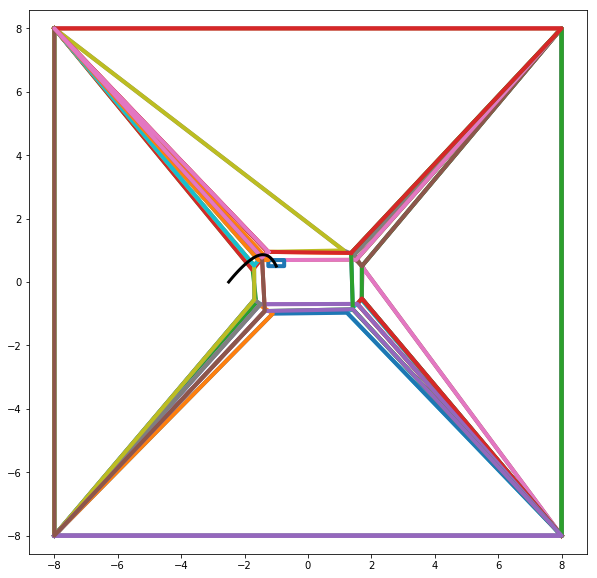

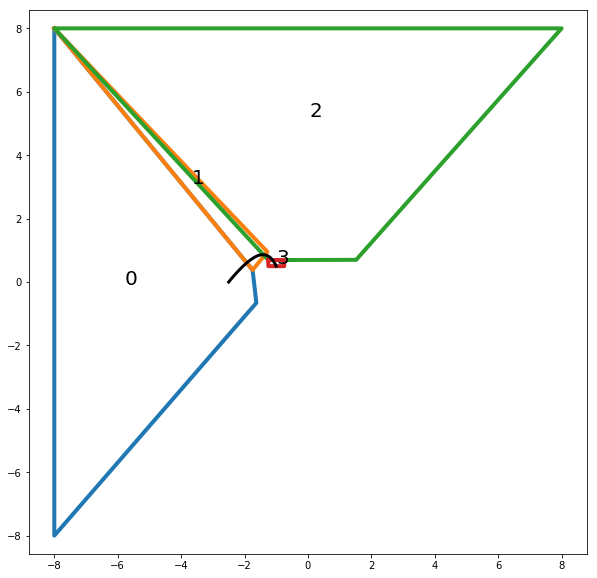

SETTING ENDPOINTS
Calculated C-Space: 0.340048 seconds
Set up graph: 0.119483 seconds
finding_vertex POINT (-2 0) 0.0
finding_vertex POINT (0 1) 0.0
found path endpoint hulls 28 30
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 171
0.001684 seconds
ADDING COSTS
Number of costs 13
0.004885 seconds
ADDING CONSTRAINTS
Number of constraints 1006
0.093433 seconds
PLANNING
SolutionResult.kSolutionFound
0.202846 seconds

SETTING ENDPOINTS
Calculated C-Space: 0.315496 seconds
Set up graph: 0.098306 seconds
finding_vertex POINT (-2 0) 0.0
finding_vertex POINT (0 1) 0.0
found path endpoint hulls 28 30
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 116
0.003223 seconds
ADDING COSTS
Number of costs 12
0.012705 seconds
ADDING CONSTRAINTS
Number of constraints 286
0.123889 seconds
PLANNING
SolutionResult.kSolutionFound
0.113131 seconds

Time Scaling target: 1.000000, result: 1.000000


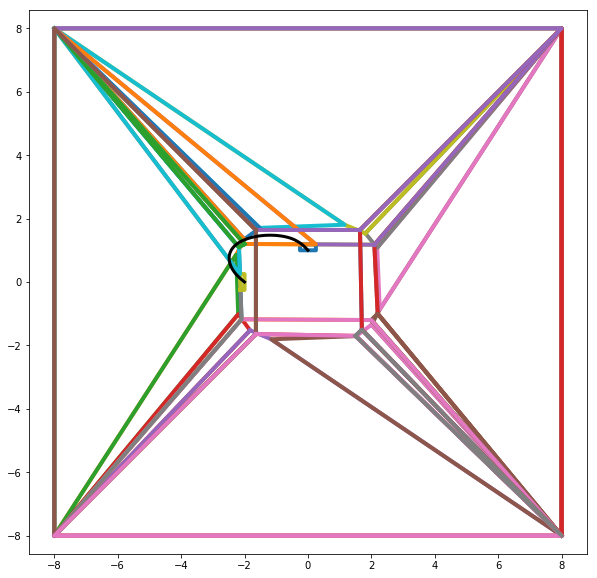

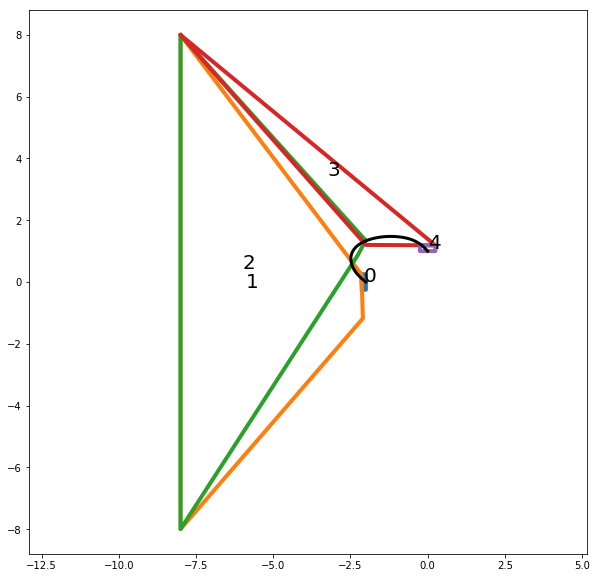

SETTING ENDPOINTS
Calculated C-Space: 0.177120 seconds
Set up graph: 0.231222 seconds
finding_vertex POINT (2.5 0) 0.0
finding_vertex POINT (0 0.5) 180.0
found path endpoint hulls 38 31
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 193
0.005995 seconds
ADDING COSTS
Number of costs 13
0.008253 seconds
ADDING CONSTRAINTS
Number of constraints 1298
0.129669 seconds
PLANNING
SolutionResult.kSolutionFound
0.096008 seconds

Time Scaling target: 1.000000, result: 1.000000


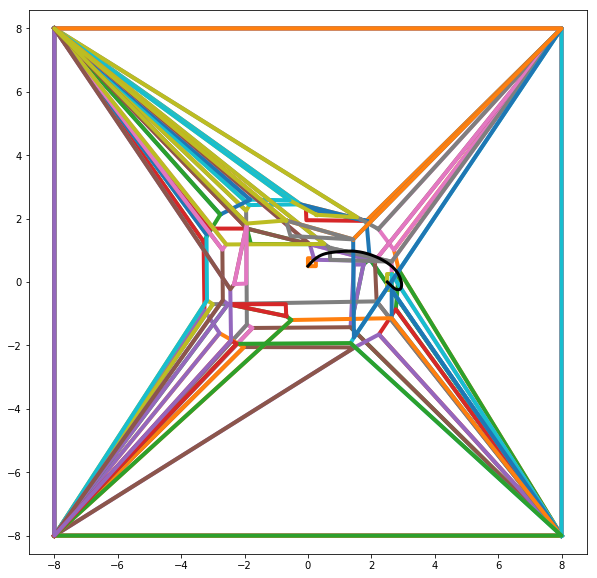

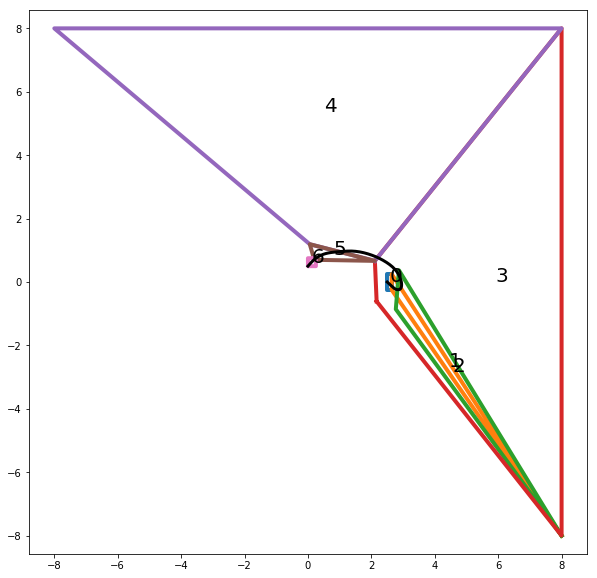

SETTING ENDPOINTS
Calculated C-Space: 0.263424 seconds
Set up graph: 0.136117 seconds
finding_vertex POINT (-5 0) 0.0
finding_vertex POINT (5 0) 0.0
found path endpoint hulls 13 8
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 149
0.001534 seconds
ADDING COSTS
Number of costs 13
0.004886 seconds
ADDING CONSTRAINTS
Number of constraints 588
0.082426 seconds
PLANNING
SolutionResult.kSolutionFound
0.116042 seconds

Time Scaling target: 1.000000, result: 1.000000


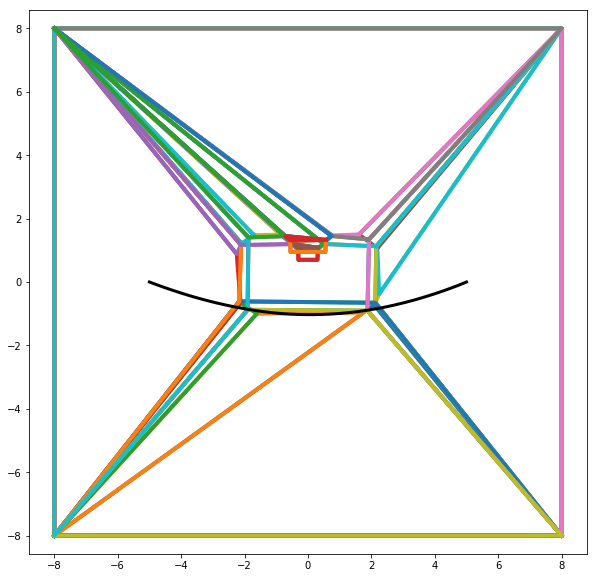

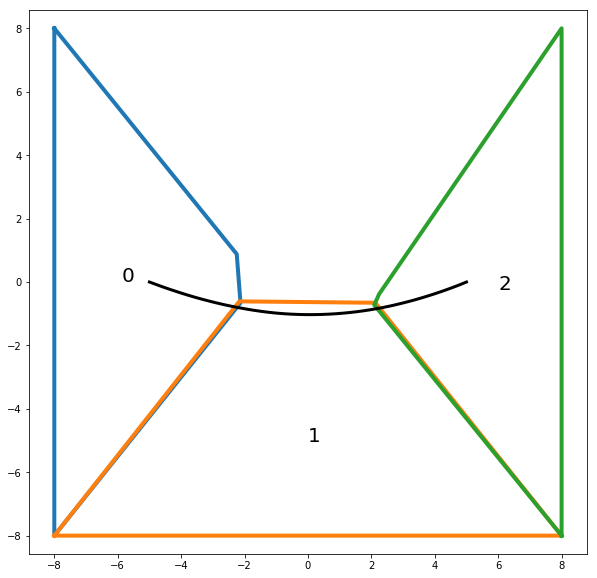

SETTING ENDPOINTS
Calculated C-Space: 0.263477 seconds
Set up graph: 0.141099 seconds
finding_vertex POINT (-2 0) 0.0
finding_vertex POINT (0 0.5) 0.0
found path endpoint hulls 34 38
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 182
0.002018 seconds
ADDING COSTS
Number of costs 13
0.004940 seconds
ADDING CONSTRAINTS
Number of constraints 1110
0.110160 seconds
PLANNING
SolutionResult.kSolutionFound
0.130013 seconds

Time Scaling target: 1.000000, result: 1.000000


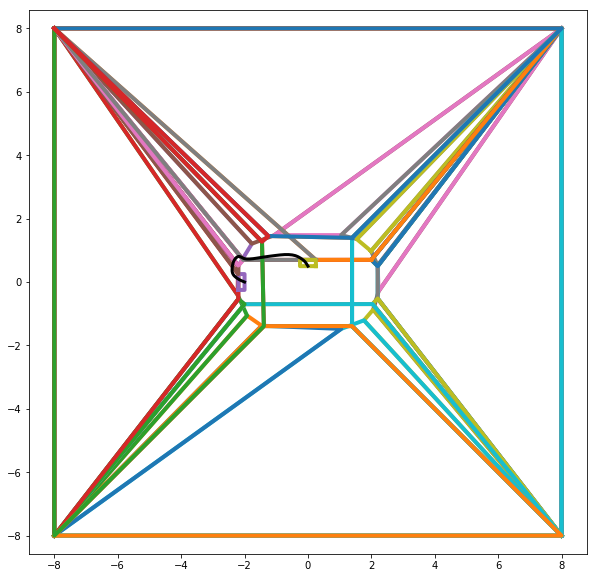

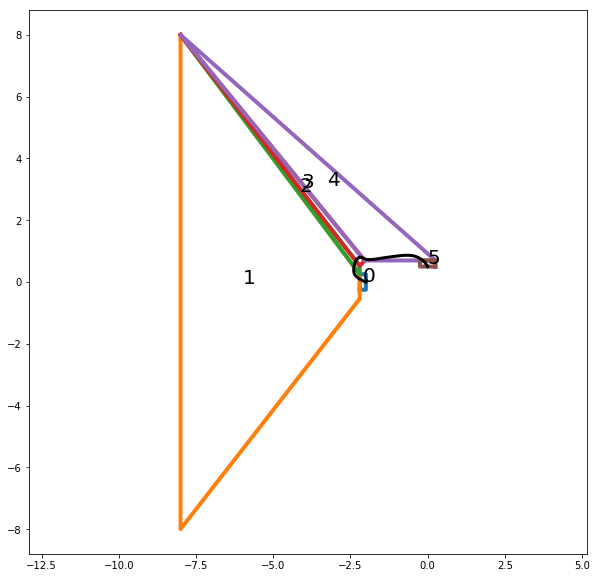

SETTING ENDPOINTS
Calculated C-Space: 0.449958 seconds
Set up graph: 0.298967 seconds
finding_vertex POINT (0 -0.5) 180.0
finding_vertex POINT (0 1.5) 180.0
found path endpoint hulls 31 32
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 204
0.002383 seconds
ADDING COSTS
Number of costs 13
0.004960 seconds
ADDING CONSTRAINTS
Number of constraints 1612
0.157350 seconds
PLANNING
SolutionResult.kSolutionFound
0.100005 seconds

Time Scaling target: 1.000000, result: 1.000000


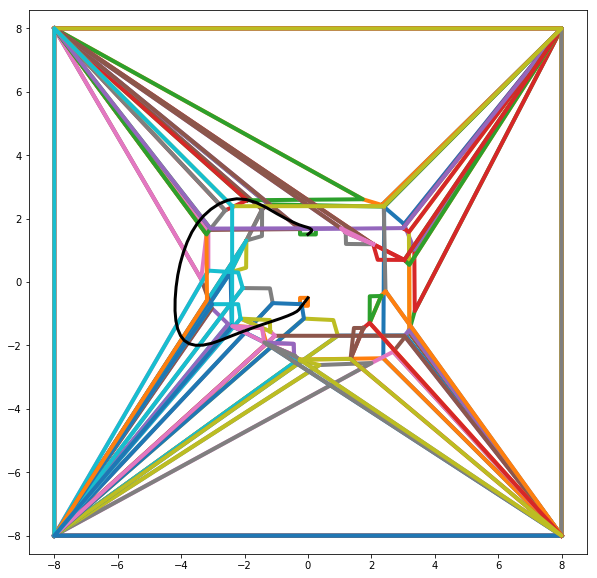

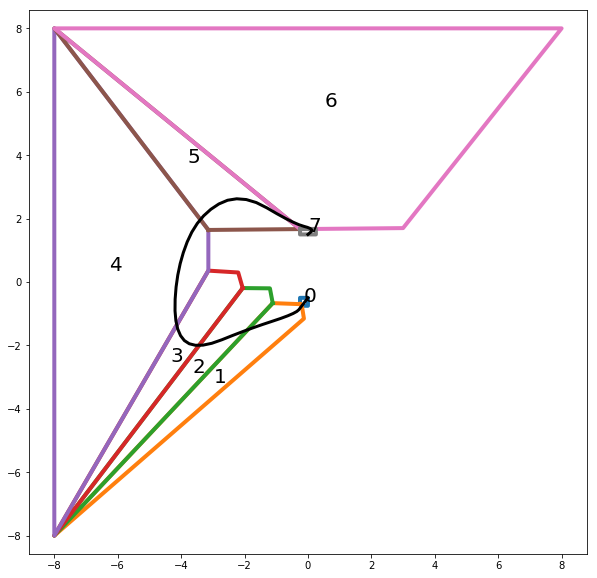

SETTING ENDPOINTS
Calculated C-Space: 0.236844 seconds
Set up graph: 0.171209 seconds
finding_vertex POINT (-2 0) 0.0
finding_vertex POINT (-1.25 0.75) 90.0
found path endpoint hulls 36 5
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 171
0.001832 seconds
ADDING COSTS
Number of costs 13
0.005115 seconds
ADDING CONSTRAINTS
Number of constraints 1048
0.101948 seconds
PLANNING
SolutionResult.kSolutionFound
0.272798 seconds

Time Scaling target: 1.000000, result: 1.000000


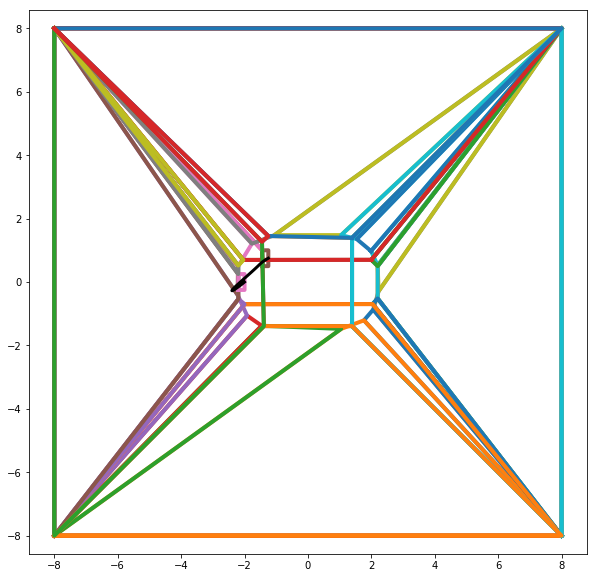

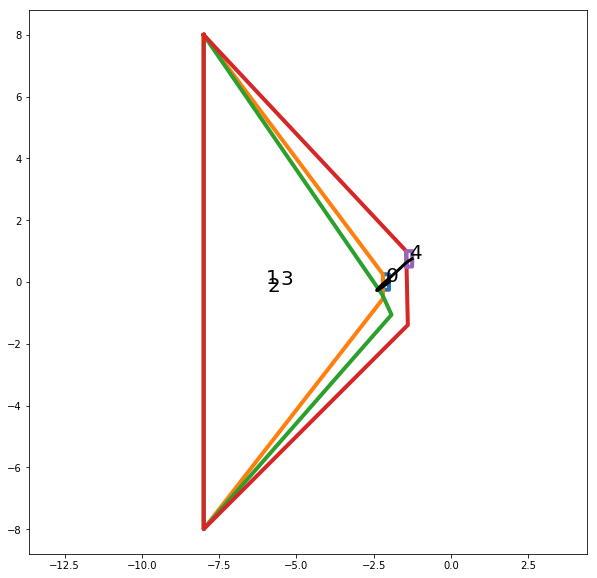

SETTING ENDPOINTS
Calculated C-Space: 0.223948 seconds
Set up graph: 0.122117 seconds
finding_vertex POINT (-1.5 0) 0.0
finding_vertex POINT (0.5 0.5) 0.0
found path endpoint hulls 29 31
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 182
0.001831 seconds
ADDING COSTS
Number of costs 13
0.004842 seconds
ADDING CONSTRAINTS
Number of constraints 1194
0.110861 seconds
PLANNING
SolutionResult.kSolutionFound
0.226989 seconds

Time Scaling target: 1.000000, result: 1.000000


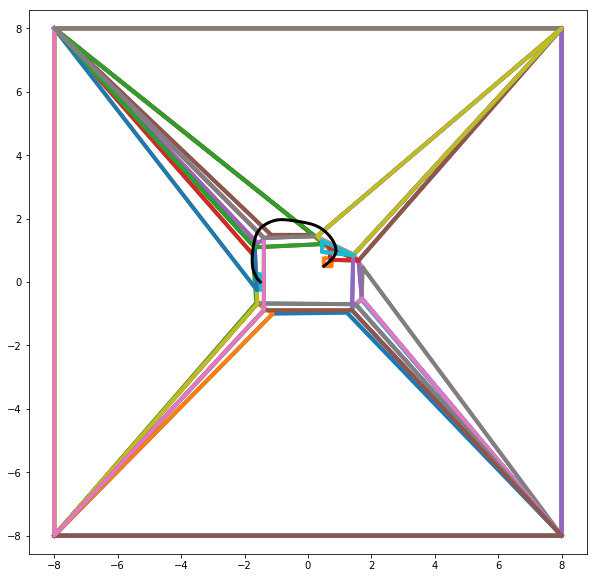

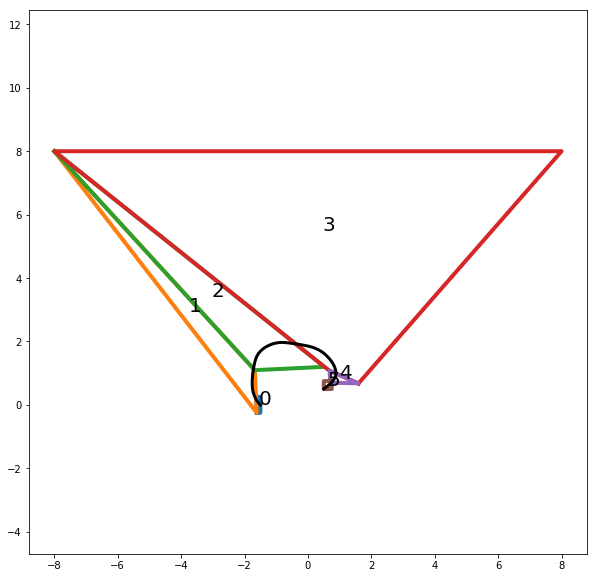

SETTING ENDPOINTS
Calculated C-Space: 0.187775 seconds
Set up graph: 0.125437 seconds
finding_vertex POINT (-2.5 0) 0.0
finding_vertex POINT (-1 0.5) 0.0
found path endpoint hulls 12 30
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 160
0.001665 seconds
ADDING COSTS
Number of costs 13
0.004834 seconds
ADDING CONSTRAINTS
Number of constraints 776
0.093862 seconds
PLANNING
SolutionResult.kSolutionFound
0.189000 seconds

Time Scaling target: 1.000000, result: 1.000000


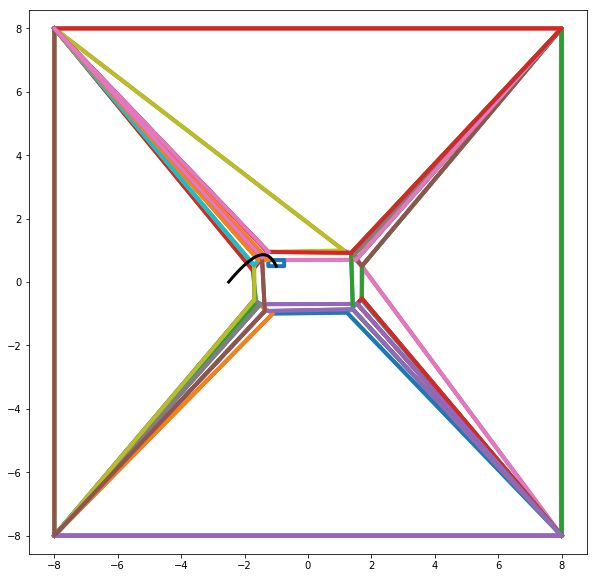

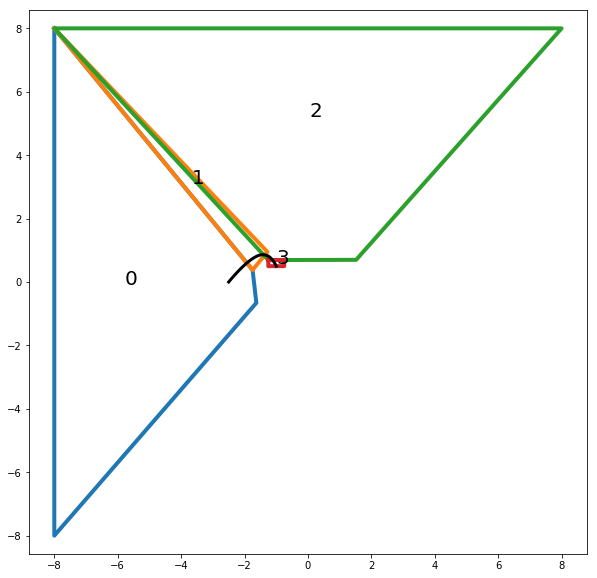

SETTING ENDPOINTS
Calculated C-Space: 0.339353 seconds
Set up graph: 0.121957 seconds
finding_vertex POINT (-2 0) 0.0
finding_vertex POINT (0 1) 0.0
found path endpoint hulls 28 30
INITIALIZED ShapeBoat_spline 
boats_S:(1, 12, 6), boats_U:(1, 11, 4)
Number of decision vars 171
0.001787 seconds
ADDING COSTS
Number of costs 13
0.005083 seconds
ADDING CONSTRAINTS
Number of constraints 1006
0.100467 seconds
PLANNING
SolutionResult.kSolutionFound
0.187255 seconds

Time Scaling target: 1.000000, result: 1.000000


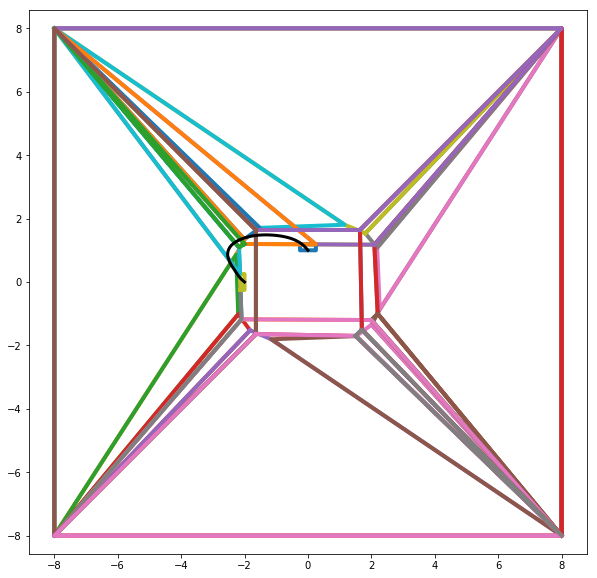

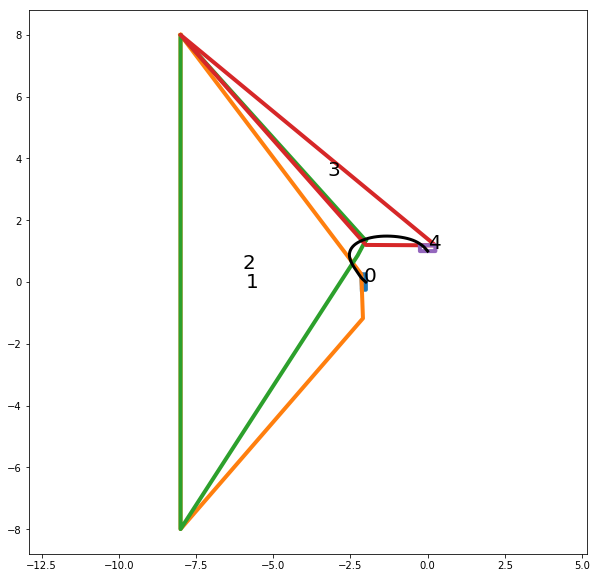

In [5]:
boats = {'line no-init':(None, ShapeBoat),
         'spline no-init':(None, ShapeBoat_spline),
         'spline init':(ShapeBoat_spline, ShapeBoat_spline)
        }

results = experiments(tests, boats)

In [6]:
table = print_results_tables(results)

line no-init
<type 'list'>
experiment           solve_time_init      solve_time_final    solve_time    pos_cost_avg    ang_cost_avg
-------------------  -----------------  ------------------  ------------  --------------  --------------
1_line_to_L                                          0.137         0.137           0.656           0.000
2_T_to_block                                         0.191         0.191           5.989           0.000
3_line_to_block                                      0.156         0.156           2.336           0.000
4_line_to_L_2                                        0.141         0.141           1.096           6.653
5_U_to_block                                         0.153         0.153           3.595          26.611
6_line_to_block_2                                    0.274         0.274           3.122           0.000
7_triangle_to_block                                  0.111         0.111          30.782           0.000
8_past                      

In [7]:
#print in Banti Thesis Format
print_results_tables(results, latex=True)

line no-init
<type 'list'>
experiment             solve_time_init    solve_time_final    solve_time        pos_cost_avg      ang_cost_avg
---------------------  -----------------  ------------------  ----------------  ----------------  --------------
& 1 line to L          & -                & 0.140             & \textbf{0.137}  & 0.660           & 0.000 \\
& 2 T to block         & -                & 0.190             & \textbf{0.191}  & \textbf{5.989}  & 0.000 \\
& 3 line to block      & -                & 0.160             & 0.160           & \textbf{2.336}  & 0.000 \\
& 4 line to L 2        & -                & \textbf{0.141}    & \textbf{0.141}  & 1.100           & 6.650 \\
& 5 U to block         & -                & 0.150             & 0.150           & 3.600           & 26.610 \\
& 6 line to block 2    & -                & 0.270             & 0.270           & 3.120           & 0.000 \\
& 7 triangle to block  & -                & 0.110             & 0.110           & 30.780      

In [11]:
#write_results(results, 'result_dT=1')